_Lambda School Data Science_

# Regression Sprint Challenge

For this Sprint Challenge, you'll predict the price of used cars. 

The dataset is real-world. It was collected from advertisements of cars for sale in the Ukraine in 2016.

The following import statements have been provided for you, and should be sufficient. But you may not need to use every import. And you are permitted to make additional imports.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

[The dataset](https://raw.githubusercontent.com/ryanleeallred/datasets/master/car_regression.csv) contains 8,495 rows and 9 variables:

- make: manufacturer brand
- price: seller’s price in advertisement (in USD)
- body: car body type
- mileage: as mentioned in advertisement (‘000 Km)
- engV: rounded engine volume (‘000 cubic cm)
- engType: type of fuel
- registration: whether car registered in Ukraine or not
- year: year of production
- drive: drive type

Run this cell to read the data:

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/car_regression.csv')
print(df.shape)
df.sample(10)

(8495, 9)


,make,price,body,mileage,engV,engType,registration,year,drive
1125,67,23000.0,3,0,1.8,3,1,2016,0
2418,50,20000.0,0,251,5.0,1,1,2002,1
5388,5,7400.0,3,277,3.5,1,1,1998,2
4033,5,45000.0,3,29,2.0,0,1,2016,2
7740,57,10700.0,4,85,1.6,1,1,2011,0
8267,59,10200.0,5,149,1.5,0,1,2013,0
248,58,54900.0,3,64,4.8,3,1,2011,1
3360,4,4150.0,4,249,2.5,0,0,2004,0
5252,22,1300.0,1,178,0.9,1,1,1995,0
7882,35,13960.0,2,122,2.5,0,1,2011,1


In [3]:
df.dtypes

make              int64
price           float64
body              int64
mileage           int64
engV            float64
engType           int64
registration      int64
year              int64
drive             int64
dtype: object

In [4]:
df.isna().sum()

make            0
price           0
body            0
mileage         0
engV            0
engType         0
registration    0
year            0
drive           0
dtype: int64

# Predictive Modeling with Linear Regression

## 1.1 Split the data into an X matrix and y vector (`price` is the target we want to predict).

In [5]:
df['ln_price'] = np.log(df['price'])

In [6]:
X = df.drop(columns=['price','ln_price'])
y= df['price']

## 1.2 Split the data into test and train sets, using `train_test_split`.
You may use a train size of 80% and a test size of 20%.

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.8, test_size=0.2, random_state = 314)

## 1.3 Use scikit-learn to fit a multiple regression model, using your training data.
Use `year` and one or more features of your choice. You will not be evaluated on which features you choose. You may choose to use all features.

In [8]:
# define linear model
model = LinearRegression()

# fit
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

## 1.4 Report the Intercept and Coefficients for the fitted model.

In [10]:
coefficients = pd.Series(model.coef_, X_train.columns)

print('Coefficients: \n', coefficients)
print('Intercept: \n', model.intercept_)

Coefficients: 
 make             -33.568207
body           -1862.044905
mileage          -40.976033
engV             288.458619
engType        -1233.774993
registration    4994.170974
year            1121.097239
drive           8268.680764
dtype: float64
Intercept: 
 -2229981.83576


## 1.5 Use the test data to make predictions.

In [11]:
y_pred = model.predict(X_test)

## 1.6 Use the test data to get both the Root Mean Square Error and $R^2$ for the model. 
You will not be evaluated on how high or low your scores are.

In [12]:
rmse = (np.sqrt(mean_squared_error(y_test, y_pred)))
r2 = r2_score(y_test, y_pred)

print('Root Mean Squared Error', rmse)
print('R^2 Score', r2)


Root Mean Squared Error 20946.4499714
R^2 Score 0.300966646912


## 1.7 How should we interpret the coefficient corresponding to the `year` feature?
One sentence can be sufficient

The year feature coefficient is 1121 in my model, this means that a one year increase (the car is newer by one year) in year corresponds to a 1121 increase in the price. This however, may be a little misleading as the years are encoded as 4 digit numbers (ex '2016') so the actual effect on price is more like 2016 * 1121.

## 1.8 How should we interpret the Root Mean Square Error?
One sentence can be sufficient

The RMSE is the mean error on each predicted price from our model, that means that when we predict a price, our prediction is within +/- 20,946 of the actual test price.

## 1.9 How should we interpret the $R^2$?
One sentence can be sufficient

The R^2 score is the proportion of the variance in the dependent variable that is explained by the independent variables in the model. In this model, about 30% of the dependent variable variance is explaind, so our model does not replicate the test data well. 

# Log-Linear and Polynomial Regression

## 2.1 Engineer a new variable by taking the log of the price varible.

In [13]:
df['ln_price'] = np.log(df['price'])

## 2.2 Visualize scatterplots of the relationship between each feature versus the log of price, to look for non-linearly distributed features.
You may use any plotting tools and techniques.

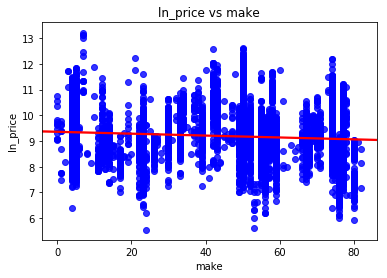

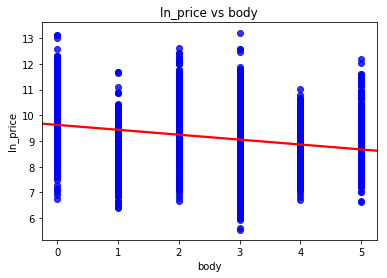

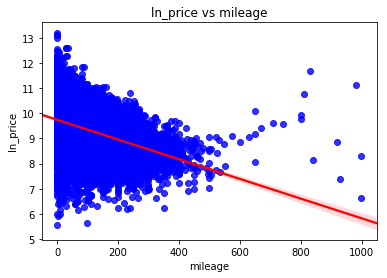

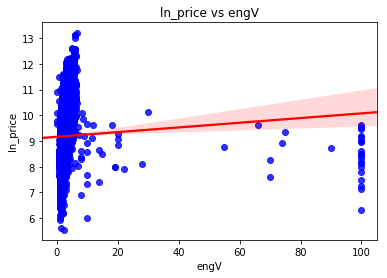

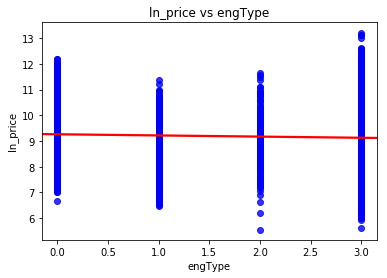

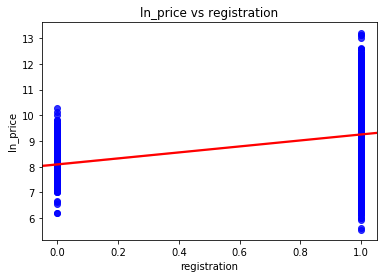

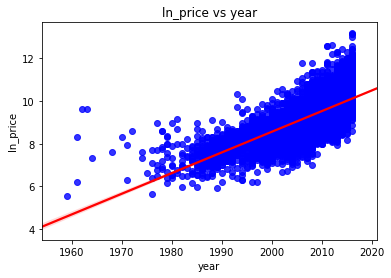

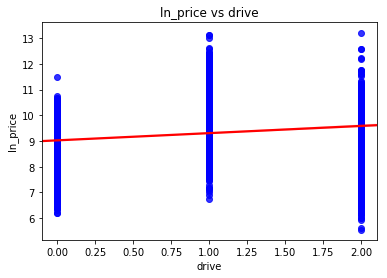

In [21]:
# ln_price plot
for col in df.select_dtypes(include='number').drop(columns=['ln_price', 'price']).columns.tolist():
    sns.regplot(df[col], df['ln_price'], scatter_kws={'color' : 'blue'}, line_kws={'color' : 'red'}).set_title('ln_price vs ' + col);
    plt.show()

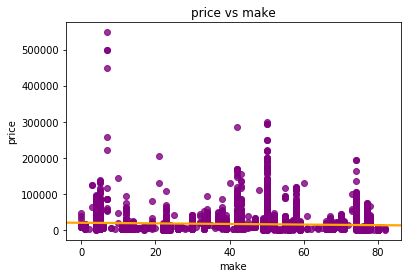

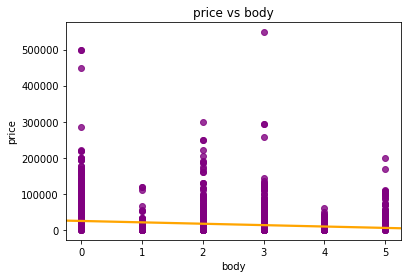

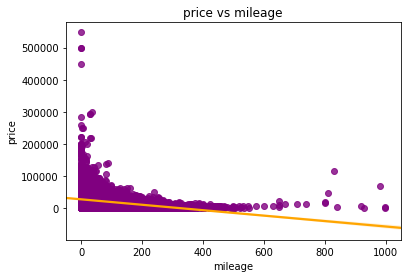

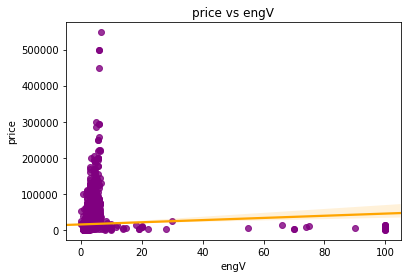

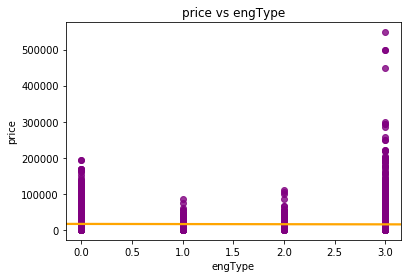

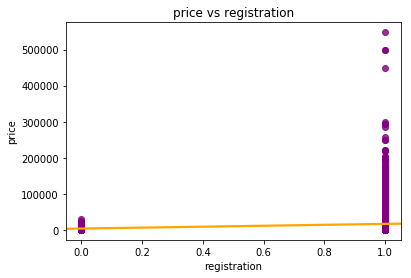

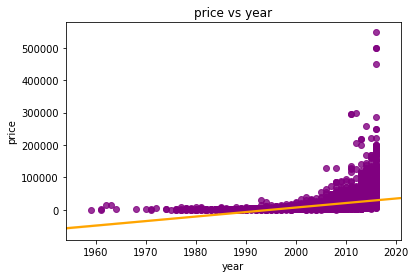

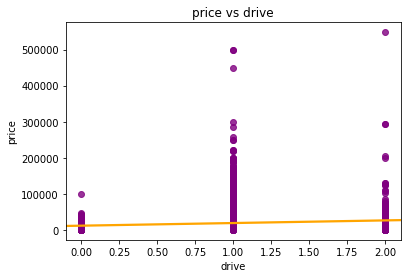

In [23]:
# simple price plot
for col in df.select_dtypes(include='number').drop(columns=['ln_price', 'price']).columns.tolist():
    sns.regplot(df[col], df['price'], scatter_kws={'color' : 'purple'}, line_kws={'color' : 'orange'}).set_title('price vs ' + col);
    plt.show()

## 2.3 Create polynomial feature(s)
You will not be evaluated on which feature(s) you choose. But try to choose appropriate features.

In [24]:
# polynomial features will be year, engV, mileage

df['year*2'] = df['year'] ** 2

df['engV*2'] = df['engV'] ** 2

df['mileage*2'] = df['mileage'] ** 2

## 2.4 Use the new log-transformed y variable and your x variables (including any new polynomial features) to fit a new linear regression model. Then report the: intercept, coefficients, RMSE, and $R^2$.

In [25]:
X = df.drop(columns=['price','ln_price'])
y= df['price']

X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.8, test_size=0.2, random_state = 314)

# define linear model
model = LinearRegression()

# fit
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

rmse = (np.sqrt(mean_squared_error(y_test, y_pred)))
r2 = r2_score(y_test, y_pred)

print('Root Mean Squared Error', rmse)
print('R^2 Score', r2)


coefficients = pd.Series(model.coef_, X_train.columns)

print('Coefficients: \n', coefficients)
print('Intercept: \n', model.intercept_)

Root Mean Squared Error 18903.7510751
R^2 Score 0.430658265737
Coefficients: 
 make               -30.106486
body             -1067.056085
mileage            -75.327530
engV              6550.894100
engType           -991.328733
registration      2591.798468
year           -200347.177850
drive             4491.067899
year*2              50.337968
engV*2             -66.654286
mileage*2            0.121093
dtype: float64
Intercept: 
 199340583.511


## 2.5 How do we interpret coefficients in Log-Linear Regression (differently than Ordinary Least Squares Regression)?
One sentence can be sufficient

Our x-coefficients now have a percentage terms effect on price so our error terms (had we generated them) would have been percentage type errors, and changes in our independent variables represent percent changes in our dependent variable. 

# Decision Trees

## 3.1 Use scikit-learn to fit a decision tree regression model, using your training data.
Use one or more features of your choice. You will not be evaluated on which features you choose. You may choose to use all features.

You may use the log-transformed target or the original un-transformed target. You will not be evaluated on which you choose.

In [27]:
X = df.drop(columns=['price','ln_price'])
y= df['price']

X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.8, test_size=0.2, random_state = 314)

# define tree model
tree = DecisionTreeRegressor()

# fit
tree.fit(X_train, y_train)

y_pred = tree.predict(X_test)


## 3.2 Use the test data to get the $R^2$ for the model. 
You will not be evaluated on how high or low your scores are.

In [29]:
print('R^2 Score', tree.score(X_test, y_test))

R^2 Score 0.734792386533


# Regression Diagnostics

## 4.1 Use statsmodels to run a log-linear or log-polynomial linear regression with robust standard errors.

In [30]:
# statsmodels for log linear regression
model = sm.OLS(y, sm.add_constant(X))
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.411
Model:                            OLS   Adj. R-squared:                  0.410
Method:                 Least Squares   F-statistic:                     538.2
Date:                Fri, 03 May 2019   Prob (F-statistic):               0.00
Time:                        08:54:42   Log-Likelihood:                -95641.
No. Observations:                8495   AIC:                         1.913e+05
Df Residuals:                    8483   BIC:                         1.914e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         2.085e+08   1.19e+07     17.510   

/usr/lib/python3/dist-packages/numpy/core/fromnumeric.py:57: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return getattr(obj, method)(*args, **kwds)


## 4.2 Calculate the Variance Inflation Factor (VIF) of our X variables. 

### Do we have multicollinearity problems?
One sentence can be sufficient

In [31]:
# VIF for fun
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = [variance_inflation_factor((sm.add_constant(X)).values, i) for i in range(len(X.columns))]

pd.Series(vif, X.columns)

/usr/lib/python3/dist-packages/numpy/core/fromnumeric.py:57: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return getattr(obj, method)(*args, **kwds)


make            3.418029e+09
body            1.062331e+00
mileage         1.189462e+00
engV            7.531883e+00
engType         2.365849e+01
registration    1.171765e+00
year            1.108933e+00
drive           1.640462e+05
year*2          1.250807e+00
engV*2          1.643797e+05
mileage*2       2.350313e+01
dtype: float64

Yes, drive, make, and engV*2 have large VIFs so are probably multicolinear. 

In [32]:
# if I drop these columns and run the regression again, lets see:
X = df.drop(columns=['price','ln_price', 'make', 'drive', 'engV*2'])
y= df['price']

# statsmodels for log linear regression
model = sm.OLS(y, sm.add_constant(X))
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.276
Model:                            OLS   Adj. R-squared:                  0.276
Method:                 Least Squares   F-statistic:                     405.2
Date:                Fri, 03 May 2019   Prob (F-statistic):               0.00
Time:                        08:59:15   Log-Likelihood:                -96516.
No. Observations:                8495   AIC:                         1.930e+05
Df Residuals:                    8486   BIC:                         1.931e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         2.226e+08   1.32e+07     16.913   

/usr/lib/python3/dist-packages/numpy/core/fromnumeric.py:57: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return getattr(obj, method)(*args, **kwds)
